In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

The prediction of the model given the input vector $x$ is computed by the mean of the nearest data points within a specific metric, for example, the euclidian distance.


$$
\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i
$$

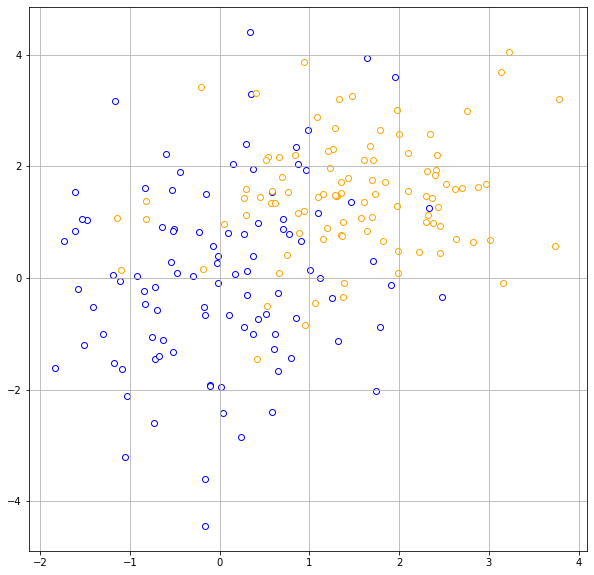

In [147]:
x1 = norm.rvs(loc=0, scale=1, size=100)
x2 = norm.rvs(loc=0, scale=1.5, size=100)

blue = np.append(x1, x2).reshape(2, 100)

x1 = norm.rvs(loc=1.5, scale=1, size=100)
x2 = norm.rvs(loc=1.5, scale=1, size=100)

orange = np.append(x1, x2).reshape(2, 100)

plt.figure(figsize=(10, 10))

plt.scatter(blue[0], blue[1], color="white", edgecolor="blue")
plt.scatter(orange[0], orange[1], color="white", edgecolor="orange")

plt.grid()
plt.show()

In [148]:
X = np.concatenate([blue, orange], axis=1).T
X.shape

(200, 2)

In [149]:
Y = np.ones(200)
Y[100:] = 0
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [150]:
def sqr_euclidian_distance(x1, x2):
    return np.dot((x1 - x2).T, (x1 - x2))

def nearest(x0, X, k=1):
    """
    Naive computation of K nearest neighbors
    """

    neighbors_distances = {}
    for i, neighbor in enumerate(X):
        neighbors_distances[sqr_euclidian_distance(x0, neighbor)] = i

    nearest = sorted(list(neighbors_distances.keys()))[:k]

    return np.array([neighbors_distances[distance] for distance in nearest])

In [151]:
sqr_euclidian_distance(X[0], X[1])

0.7127340671301159

In [152]:
nearest(X[1], X, k=3)

array([ 1,  6, 77])

In [153]:
def majority(neighbors_idx, Y):
    
    classes = []
    
    for idx in neighbors_idx:
        classes.append(Y[idx])
        
    ones = classes.count(1)
    zeros = classes.count(0)
    
    return 1 if ones > zeros else 0

In [164]:
t = np.linspace(-2, 5, 50)
u = np.linspace(-3, 4, 50)
tt, uu = np.meshgrid(t, u)
grid = np.stack((tt, uu)).T

In [165]:
grid = grid.reshape((2500, 2))

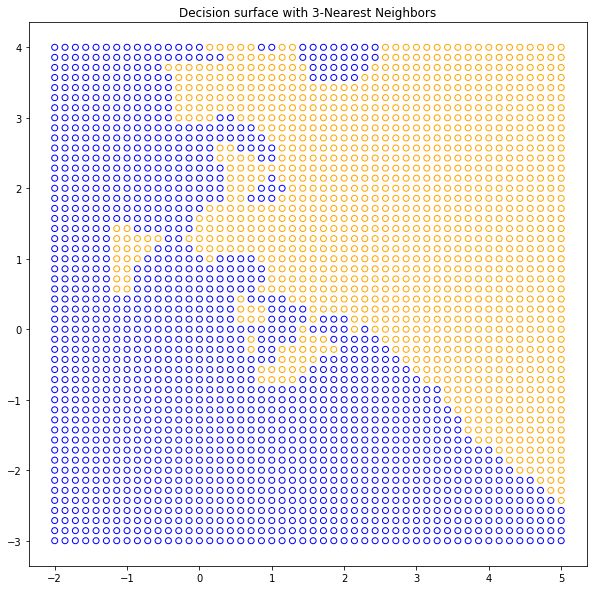

In [166]:
plt.figure(figsize=(10, 10))

colors = []

for point in grid:
    class_ = majority(nearest(point, X, k=3), Y)
    colors.append("orange" if class_ == 0 else "blue")
    
plt.scatter(grid.T[0], grid.T[1], color="white", edgecolor=colors)

plt.title("Decision surface with 3-Nearest Neighbors")
plt.show()

# References

[1] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction. Springer Science & Business Media. Chapter 2.